In [29]:
import h3
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box, MultiPolygon, mapping
import json
import geojson

In [87]:
bbox_ri = box(-71.86277, 41.146339, -71.12057, 42.018798)

In [76]:
# Convert bounding box to a GeoDataFrame
gdf_bbox_ri = gpd.GeoDataFrame({'geometry': [bbox_ri]}, crs='EPSG:4326')


In [68]:
def get_h3_hexagons(bounding_box, resolution):
    box_dict = json.loads(geojson.dumps(bounding_box))
    hexagons = h3.polyfill(box_dict, resolution)
    hex_geoms = [Polygon(h3.h3_to_geo_boundary(h, geo_json=True)) for h in hexagons]
    return gpd.GeoDataFrame({'geometry': hex_geoms}, crs='EPSG:4326')

# Generate H3 hexagons for two different resolutions
resolution1 = 8
resolution2 = 9

In [83]:
ri_hex8 = get_h3_hexagons(geojson.Polygon(geometry=mapping(bbox_ri)), 8)

IndexError: list index out of range

In [85]:
bbox_coords = geojson.Polygon(geometry=mapping(bbox_ri))
bbox_coords

{"coordinates": [], "geometry": {"coordinates": [[[-71.12057, 41.146339], [-71.12057, 42.018798], [-71.86277, 42.018798], [-71.86277, 41.146339], [-71.12057, 41.146339]]], "type": "Polygon"}, "type": "Polygon"}

In [86]:
bbox_coords

{"coordinates": [], "geometry": {"coordinates": [[[-71.12057, 41.146339], [-71.12057, 42.018798], [-71.86277, 42.018798], [-71.86277, 41.146339], [-71.12057, 41.146339]]], "type": "Polygon"}, "type": "Polygon"}

In [8]:
polygon = geojson.Polygon([bbox_coords])


In [9]:
polygon

{"coordinates": [[[-71.12057, 41.146339], [-71.12057, 42.018798], [-71.86277, 42.018798], [-71.86277, 41.146339], [-71.12057, 41.146339]]], "type": "Polygon"}

In [10]:
ri_hex8 = get_h3_hexagons(polygon, 8)

TypeError: Argument 'geojson' has incorrect type (expected dict, got list)

In [33]:
geojson_polygon = {
    "type": "Polygon",
    "coordinates": [[
        [-71.12057, 41.146339],
        [-71.12057, 42.018798],
        [-71.86277, 42.018798],
        [-71.86277, 41.146339],
        [-71.12057, 41.146339]
    ]]
}

In [12]:
polygon_coords = geojson_polygon['coordinates'][0]

In [15]:
polygon = Polygon(polygon_coords)
resolution = 8

In [17]:
polygon.__geo_interface__['coordinates'][0]

((-71.12057, 41.146339),
 (-71.12057, 42.018798),
 (-71.86277, 42.018798),
 (-71.86277, 41.146339),
 (-71.12057, 41.146339))

In [18]:
list(polygon.__geo_interface__['coordinates'][0])

[(-71.12057, 41.146339),
 (-71.12057, 42.018798),
 (-71.86277, 42.018798),
 (-71.86277, 41.146339),
 (-71.12057, 41.146339)]

In [34]:
hexagons = h3.polyfill(geojson_polygon, resolution)

In [23]:
hexagons

{'88e720710bfffff',
 '88e7200d59fffff',
 '88e7200c11fffff',
 '88e7207ab5fffff',
 '88e7200d23fffff',
 '88e720029dfffff',
 '88e7200cb3fffff',
 '88e72070a7fffff',
 '88e722b61bfffff',
 '88e7203319fffff',
 '88e7207891fffff',
 '88e7203b11fffff',
 '88e720700dfffff',
 '88e72071d5fffff',
 '88e7200d69fffff',
 '88e7200d15fffff',
 '88e7204c43fffff',
 '88e7204d63fffff',
 '88e720046bfffff',
 '88e7200e1bfffff',
 '88e720310bfffff',
 '88e7207967fffff',
 '88e72014abfffff',
 '88e7200195fffff',
 '88e7200019fffff',
 '88e72071e7fffff',
 '88e720a907fffff',
 '88e7204d4dfffff',
 '88e7200dc1fffff',
 '88e7206333fffff',
 '88e722b6ddfffff',
 '88e72072d7fffff',
 '88e7204d8bfffff',
 '88e72000d5fffff',
 '88e7200d13fffff',
 '88e72078a5fffff',
 '88e7207609fffff',
 '88e7204d8dfffff',
 '88e72004edfffff',
 '88e7203a01fffff',
 '88e7204e2bfffff',
 '88e7207353fffff',
 '88e7200e63fffff',
 '88e7200439fffff',
 '88e7203943fffff',
 '88e720632dfffff',
 '88e72046a1fffff',
 '88e7200e9dfffff',
 '88e7207647fffff',
 '88e7203129fffff',


In [24]:
hex_geoms = [Polygon(h3.h3_to_geo_boundary(h, geo_json=True)) for h in hexagons]

In [25]:
gdf_hex = gpd.GeoDataFrame({'geometry': hex_geoms}, crs='EPSG:4326')


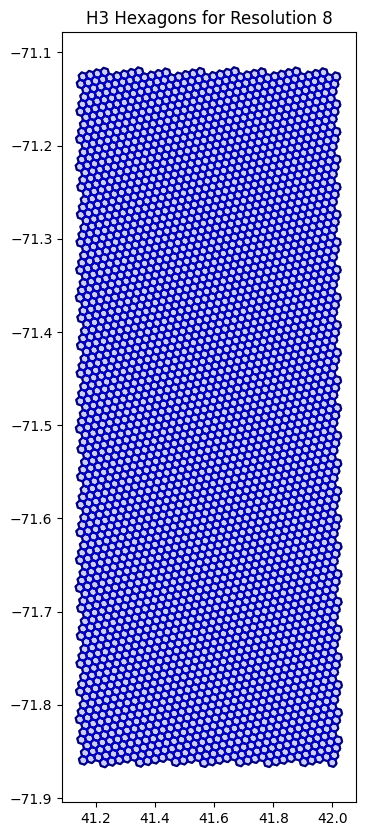

In [26]:
# Plot the polygon and H3 hexagons
fig, ax = plt.subplots(figsize=(10, 10))
gdf_hex.boundary.plot(ax=ax, color='black')
gdf_hex.boundary.plot(ax=ax, color='blue', alpha=0.5)
gdf_hex.plot(ax=ax, color='blue', alpha=0.2)
plt.title(f'H3 Hexagons for Resolution {resolution}')
plt.show()

In [27]:
gdf_bbox

,geometry
0,"POLYGON ((-71.12057 41.14634, -71.12057 42.018..."


In [28]:
hexagons = h3.polyfill(gdf_bbox, resolution)

TypeError: Argument 'geojson' has incorrect type (expected dict, got GeoDataFrame)

In [30]:
geojson_polygon = geojson.Feature(geometry=mapping(box_ri))



In [31]:
geojson_polygon

{"geometry": {"coordinates": [[[-71.12057, 41.146339], [-71.12057, 42.018798], [-71.86277, 42.018798], [-71.86277, 41.146339], [-71.12057, 41.146339]]], "type": "Polygon"}, "properties": {}, "type": "Feature"}

In [32]:
hexagons = h3.polyfill(geojson_polygon, resolution)

TypeError: Argument 'geojson' has incorrect type (expected dict, got Feature)

In [39]:
geojson_polygon = {
    "type": "Polygon",
    "coordinates": [[
        [-71.12057, 41.146339],
        [-71.12057, 42.018798],
        [-71.86277, 42.018798],
        [-71.86277, 41.146339],
        [-71.12057, 41.146339]
    ]]
}

hexagons = h3.polyfill(geojson_polygon, resolution)

In [60]:
geojson_polygon_convert = geojson.Polygon(geometry=mapping(bbox_ri))
geojson_polygon_convert
geojson_dict = json.loads(geojson.dumps(geojson_polygon))
geojson_dict# geojson_polygon_convert["type"]

{'type': 'Polygon',
 'coordinates': [[[-71.12057, 41.146339],
   [-71.12057, 42.018798],
   [-71.86277, 42.018798],
   [-71.86277, 41.146339],
   [-71.12057, 41.146339]]]}

In [61]:
hexagons = h3.polyfill(geojson_dict, resolution)

In [62]:
geojson_polygon

{'type': 'Polygon',
 'coordinates': [[[-71.12057, 41.146339],
   [-71.12057, 42.018798],
   [-71.86277, 42.018798],
   [-71.86277, 41.146339],
   [-71.12057, 41.146339]]]}

In [63]:
geojson_dict

{'type': 'Polygon',
 'coordinates': [[[-71.12057, 41.146339],
   [-71.12057, 42.018798],
   [-71.86277, 42.018798],
   [-71.86277, 41.146339],
   [-71.12057, 41.146339]]]}

In [65]:
box_dict = json.loads(geojson.dumps(box_ri))

In [88]:
h3.geo_to_h3(60.169833, 24.938163, 6)

'861126d37ffffff'

In [95]:
hexagon_index = h3.geo_to_h3(-71.12057, 42.018798, resolution)
boundary = h3.h3_to_geo_boundary(hexagon_index, geo_json = False)

In [97]:
h3.h3_to_geo_boundary('861126d37ffffff', geo_json = False)

((60.15652369744345, 24.85652576115537),
 (60.134982075460854, 24.895664284494682),
 (60.1443197767855, 24.948769321085983),
 (60.175221029708474, 24.9627969933458),
 (60.19677983831024, 24.923627956201436),
 (60.18742019244591, 24.870461733016352))

In [104]:
hexagon_a = h3.geo_to_h3(-71.12057, 42.018798, resolution)
hexagon_b = h3.geo_to_h3(-71.86277, 42.018798, resolution)
kring = h3.h3_distance(hexagon_a, hexagon_b)

In [105]:
kring

100